# Vehicle Price
## Problema de Negocio
Se necesita saber el precio de un vehículo conociendo algunos datos sobre el.  
Para esto utilizaremos el dataset importado desde [Kaggle](https://www.kaggle.com/code/sahilislam007/vehicle-price-prediction/input)

In [1]:
# En primer lugar nos traemos los modulos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from src.utils.bootcampviztools import pinta_distribucion_categoricas, plot_categorical_relationship_fin, plot_categorical_numerical_relationship,plot_combined_graphs, plot_grouped_histograms, grafico_dispersion_con_correlacion,bubble_plot
from src.utils.ToolBox import agrupar_raros, impute_data, describe_df

## Carga de Datos y Limpieza

In [2]:
df = pd.read_csv("src/data_sample/Vehicle_Price.csv")

In [3]:
#Una vez cargado el dataset, vamos a ver que tenemos
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [4]:
# Utilizamod la funcion describe_df para ver la cardinalidad de la variables, su tipo y los valores nulos
describe_df(df)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
DATA_TYPE,object,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object
MISSINGS (%),0.0,0.055888,0.0,0.0,0.0,0.022954,0.001996,0.10479,0.006986,0.033932,0.001996,0.000998,0.002994,0.006986,0.00499,0.037924,0.0
UNIQUE_VALUES,358,761,28,153,3,859,100,5,7,95,38,197,8,4,263,91,4
CARDIN (%),0.357285,0.759481,0.027944,0.152695,0.002994,0.857285,0.0998,0.00499,0.006986,0.09481,0.037924,0.196607,0.007984,0.003992,0.262475,0.090818,0.003992


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [6]:
# Utilizamos la función impute data para los valores nulos de price, esta función nos permite introducir la media poniendo dos referencias
impute_data(df, 'price', 'name', 'model',strategy='mean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

c:\Users\luis_\OneDrive\Documentos\BOOTCAMP DATA SCIENCE\PREWORK\ML_Vehicle_Price\src\utils\ToolBox.py:367: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[feature][col] = df.loc[(df[ref1] == df[ref1][col]) & (df[ref2] == df[ref2][col]),fea

In [7]:
# Vamos a ver si hay valores nulos en la columna cylinders
df.loc[df.cylinders.isna()] 

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
14,2024 Chevrolet Blazer EV 2LT,\n \n Sterling Gray Metallic 2024 ...,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
28,2024 Chevrolet Blazer EV 2LT,Radiant Red Tintcoat 2024 Chevrolet Blazer EV ...,Chevrolet,Blazer EV,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive
33,2024 Kia EV6 GT,Yacht Blue 2024 Kia EV6 GT AWD 1-Speed Automat...,Kia,EV6,2024,49820.0,c,NaN,Electric,13.0,Automatic,GT,SUV,4.0,Yacht Blue,Black,All-wheel Drive
35,2024 Ford Mustang Mach-E Premium,2024 Ford Mustang Mach-E Premium 300A 99/86 Ci...,Ford,Mustang Mach-E,2024,47790.0,c,NaN,Electric,5.0,1-Speed Automatic,Premium,SUV,4.0,Vapor Blue,Black,All-wheel Drive
49,2024 Hyundai IONIQ 5 SE Standard Range,\n \n Vehicle pricing includes all...,Hyundai,IONIQ 5,2024,44195.0,c,NaN,Electric,14.0,1-Speed Automatic,SE Standard Range,SUV,4.0,Atlas,Gray,Rear-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2024 BMW i7 M70,"\n \n Heated/Cooled Leather Seats,...",BMW,i7,2024,195895.0,c,NaN,Electric,0.0,1-Speed Automatic,M70,Sedan,4.0,Gray Metallic,Caramel,All-wheel Drive
893,2025 Honda CR-V EX-L,\n \n WHY BUY FROM US?Our dealersh...,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive
941,2024 Hyundai IONIQ 5 SE,\n \n Five Star Hyundai of Macon i...,Hyundai,IONIQ 5,2024,38201.0,c,NaN,Electric,12.0,Automatic,SE,SUV,4.0,Teal,Gray,Rear-wheel Drive
944,2024 Kia EV6 Wind,Yacht Blue 2024 Kia EV6 Wind AWD 1-Speed Autom...,Kia,EV6,2024,41528.0,c,NaN,Electric,13.0,Automatic,Wind,SUV,4.0,Blue,Black,All-wheel Drive


In [8]:
#Despues de una revision vemos que los nulos son porque son electricos por lo que los pondremos a 0
df.loc[df.cylinders.isna(), 'cylinders'] = 0

In [9]:
# Vamos a ver si hay valores nulos en la columna doors
df.loc[df.doors.isna()]

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
124,2024 Hyundai Santa Fe Calligraphy,\n \n Rockwood Green 2024 Hyundai ...,Hyundai,Santa Fe,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,\n \n Shimmering Silver Pearl 2024...,Hyundai,Santa Fe,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,\n \n Serenity White 2024 Hyundai ...,Hyundai,Santa Fe,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,One of Sonic Automotive's Premier Dealerships,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,0.0,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,\n \n !!! CALL US AT (812) 477-620...,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
857,2025 Chevrolet Trax ACTIV,\n \n See what's behind you with t...,Chevrolet,Trax,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive
893,2025 Honda CR-V EX-L,\n \n WHY BUY FROM US?Our dealersh...,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,0.0,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive


In [10]:
# Despues de revisar vemos que todos los nulos tienen 5 puertas
df.loc[df.doors.isna(), 'doors'] = 5

In [11]:
# Revisamos los nulos de Body
df.loc[df.body.isna()]

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
164,2024 Dodge Hornet R/T EAWD,"\n \n Fresh Arrival!, CALL 239-424...",Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,2024 Dodge Hornet R/T EAWD,\n \n CALL 239-424-7514 to set up ...,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive
687,2024 INFINITI QX50 SPORT,\n \n Radiant White 2024 INFINITI ...,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive


In [12]:
#son SUVs
df.loc[df.body.isna(), 'body'] = 'SUV'

In [13]:
# Utilizamos la función impute data para los valores nulos de mileage, esta función nos permite introducir la media poniendo dos referencias
impute_data(df, 'mileage', 'name', 'model',strategy='mean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1000 non-null   object 
 7   cylinders       1002 non-null   float64
 8   fuel            995 non-null    object 
 9   mileage         1002 non-null   float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            1002 non-null   object 
 13  doors           1002 non-null   float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

c:\Users\luis_\OneDrive\Documentos\BOOTCAMP DATA SCIENCE\PREWORK\ML_Vehicle_Price\src\utils\ToolBox.py:367: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[feature][col] = df.loc[(df[ref1] == df[ref1][col]) & (df[ref2] == df[ref2][col]),fea

In [14]:
#revisamos los nulos de fuel
df.loc[df.fuel.isna()]

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
128,2024 Subaru Solterra Premium,2024 Subaru Solterra Galactic Black Fox Subaru...,Subaru,Solterra,2024,39934.0,c,0.0,NaN,5.000000,1-Speed Automatic,Premium,SUV,4.0,Galactic,Black,All-wheel Drive
219,2024 Honda Prologue TOURING,\n \n Shop Your Way Hoffman Honda ...,Honda,Prologue,2024,55800.0,c,0.0,NaN,69.033058,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive
315,2024 Honda Prologue TOURING,\n \n Shop Your Way Hoffman Honda ...,Honda,Prologue,2024,56550.0,c,0.0,NaN,1.000000,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
489,2024 Honda Prologue TOURING,\n \n Shop Your Way Hoffman Honda ...,Honda,Prologue,2024,55800.0,c,0.0,NaN,69.033058,1-Speed Automatic,TOURING,SUV,4.0,Pearl,Black,All-wheel Drive
490,2024 Honda Prologue TOURING,\n \n Shop Your Way Hoffman Honda ...,Honda,Prologue,2024,55800.0,c,0.0,NaN,69.033058,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,One of Sonic Automotive's Premier Dealerships,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,0.0,NaN,0.000000,Automatic,RS,SUV,5.0,Sterling Gray Metallic,Black,Front-wheel Drive
726,2024 Jaguar I-PACE EV400 R-Dynamic HSE,Contact our Sales Team at(708)342-0400 for mo...,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,0.0,NaN,8.000000,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive


In [15]:
#vemos que son electricos
df.loc[df.fuel.isna(), 'fuel'] = 'Electric'

In [16]:
#Quitamos la columna description ya que no la usaremos por su alta cardinalidad
df.drop(columns=['description'], inplace=True)

In [17]:
# Describimos el dataframe
describe_df(df)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
DATA_TYPE,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.001996,0.0,0.0,0.0,0.001996,0.000998,0.0,0.0,0.00499,0.037924,0.0
UNIQUE_VALUES,358,28,153,3,861,100,5,7,97,38,197,8,4,263,91,4
CARDIN (%),0.357285,0.027944,0.152695,0.002994,0.859281,0.0998,0.00499,0.006986,0.096806,0.037924,0.196607,0.007984,0.003992,0.262475,0.090818,0.003992


In [18]:
# Ahora agruparemos las variables en categoricas
cat_cols = df.select_dtypes(include="object").columns.tolist()


In [19]:
#Al haber una alta cardinalidad en varias de las columnas categoricas lo cual puede provocar problemas de overfitting, llamaremos a los valores poco comunes como otros
for col in cat_cols:
    agrupar_raros(df, col,umbral=0.01) #deben tener un minimo un 0,01 de frequencia relativa para no ser considerados raros

In [20]:
describe_df(df)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
DATA_TYPE,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.001996,0.0,0.0,0.0,0.001996,0.000998,0.0,0.0,0.00499,0.037924,0.0
UNIQUE_VALUES,18,18,27,3,861,27,5,6,97,11,27,6,4,20,9,4
CARDIN (%),0.017964,0.017964,0.026946,0.002994,0.859281,0.026946,0.00499,0.005988,0.096806,0.010978,0.026946,0.005988,0.003992,0.01996,0.008982,0.003992


In [21]:
df_bakcup = df.copy() #creamos una copia del dataframe

In [22]:
# Liberamos los missing values de las variables categoricas
df.dropna(inplace=True)

In [23]:
df.drop(df[df.price == 0].index, inplace = True) # Eliminamos los registros con precio 0 para evitar problemas en el modelo, es solo un registro


In [24]:
describe_df(df)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
DATA_TYPE,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,18,17,26,3,822,27,5,6,94,11,27,6,4,20,9,4
CARDIN (%),0.018809,0.017764,0.027168,0.003135,0.858934,0.028213,0.005225,0.00627,0.098224,0.011494,0.028213,0.00627,0.00418,0.020899,0.009404,0.00418


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            957 non-null    object 
 1   make            957 non-null    object 
 2   model           957 non-null    object 
 3   year            957 non-null    int64  
 4   price           957 non-null    float64
 5   engine          957 non-null    object 
 6   cylinders       957 non-null    float64
 7   fuel            957 non-null    object 
 8   mileage         957 non-null    float64
 9   transmission    957 non-null    object 
 10  trim            957 non-null    object 
 11  body            957 non-null    object 
 12  doors           957 non-null    float64
 13  exterior_color  957 non-null    object 
 14  interior_color  957 non-null    object 
 15  drivetrain      957 non-null    object 
dtypes: float64(4), int64(1), object(11)
memory usage: 127.1+ KB


In [26]:
#Creamos una variable años de antiguedad
df['years_old'] = 2025 - df['year']

In [27]:
# Hacemos la separación en train y test, y utilizamos la variable price como variable objetivo
# Utilizamos stratify con la variable make para que esten presentes los fabricantes en formas parecidas en train y test
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df.make, random_state=42)

In [28]:
target = 'price'

## Análisis

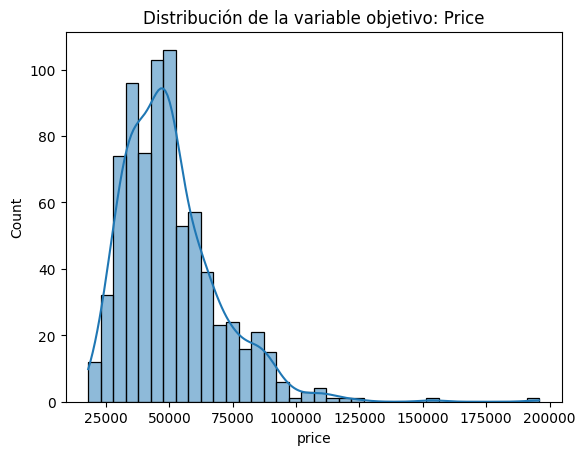

In [29]:
# Observamos la varible objetivo
sns.histplot(train_set[target], kde=True)
plt.title('Distribución de la variable objetivo: Price')
plt.savefig('src/img/distribucion_price.png', dpi=300, bbox_inches='tight')


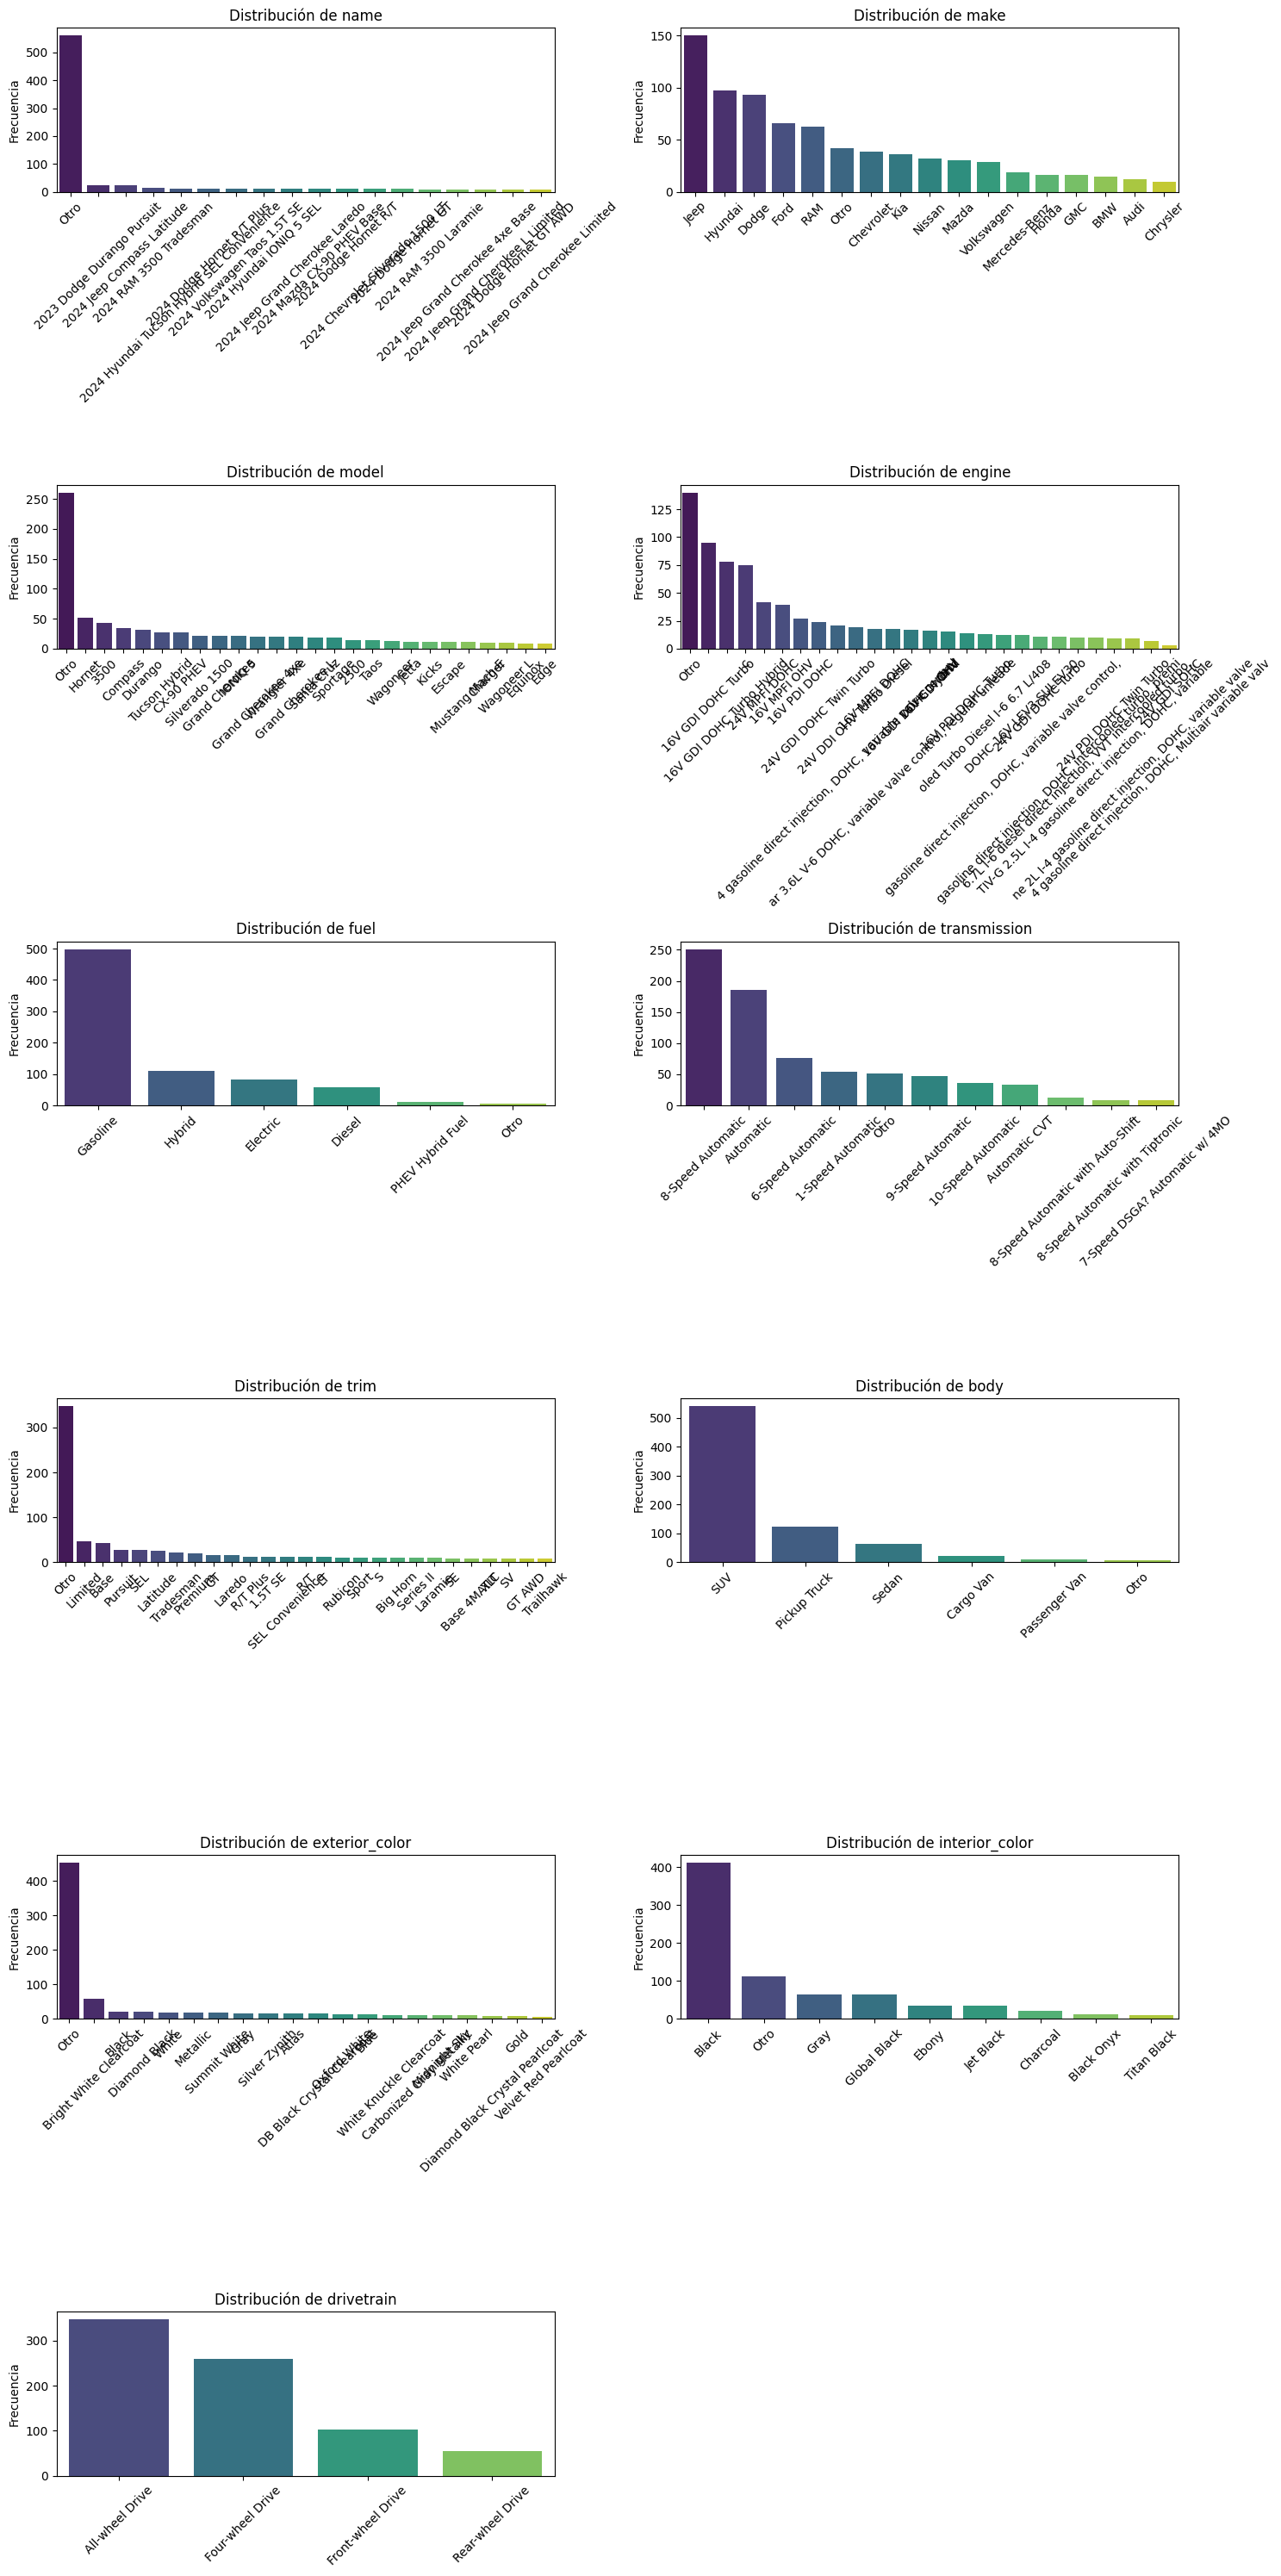

In [30]:
# Ahora observaremos las variables categoricas
pinta_distribucion_categoricas(train_set, cat_cols)

In [31]:
# Ahora observamos la variables numericas
num_cols = train_set.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols.remove(target)  # Eliminamos la variable objetivo de la lista de variables numéricas

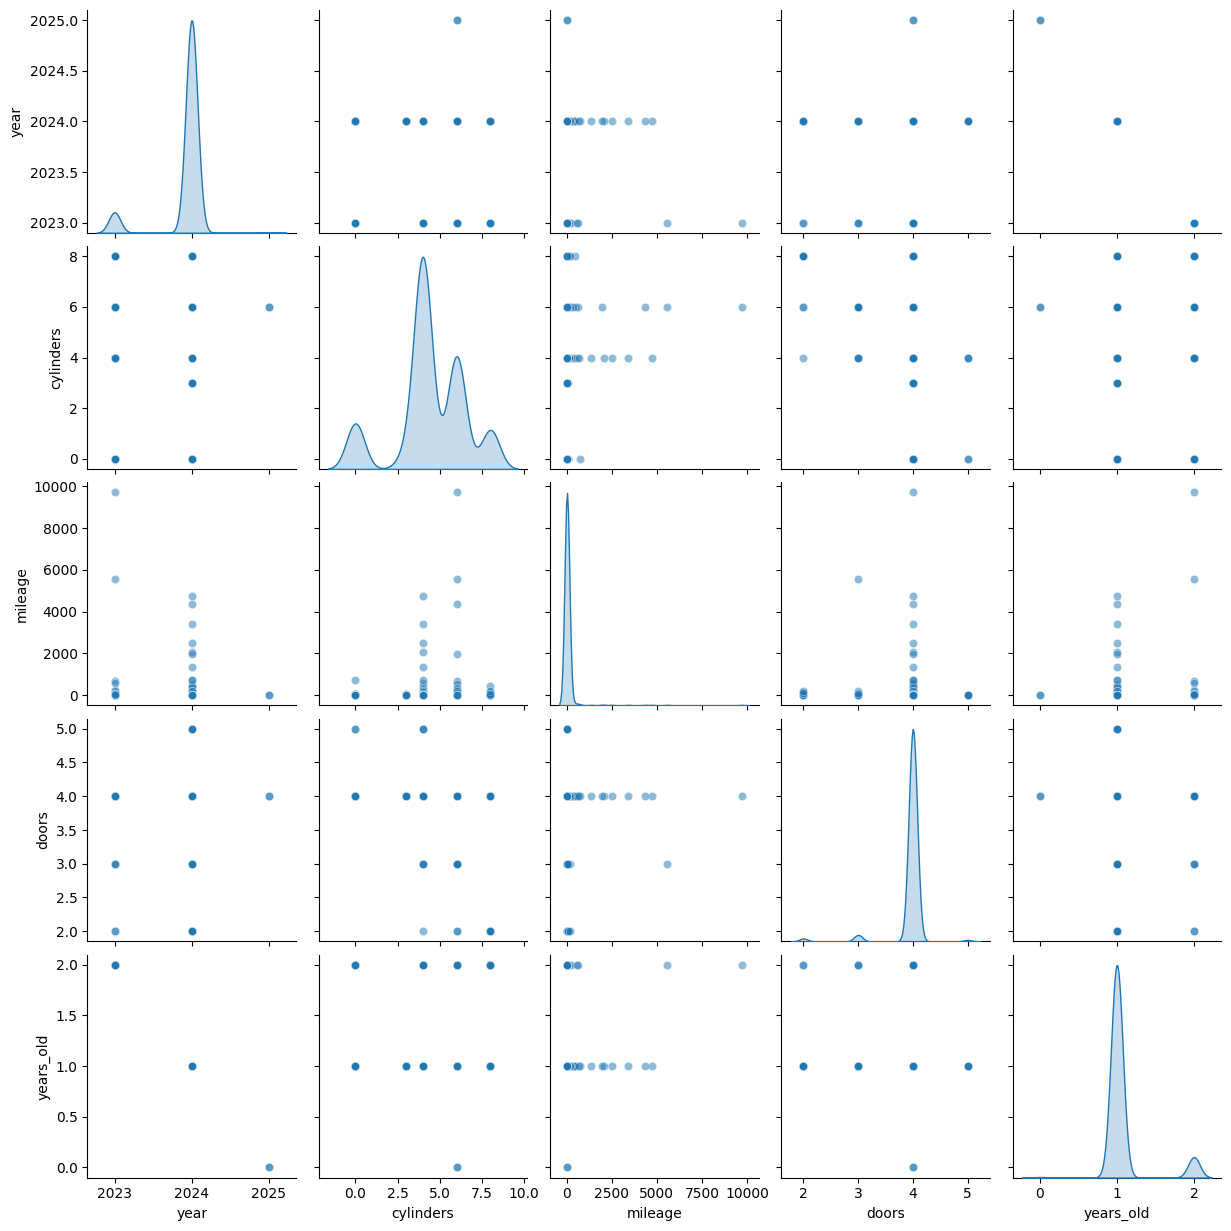

In [32]:
sns.pairplot(train_set[num_cols], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

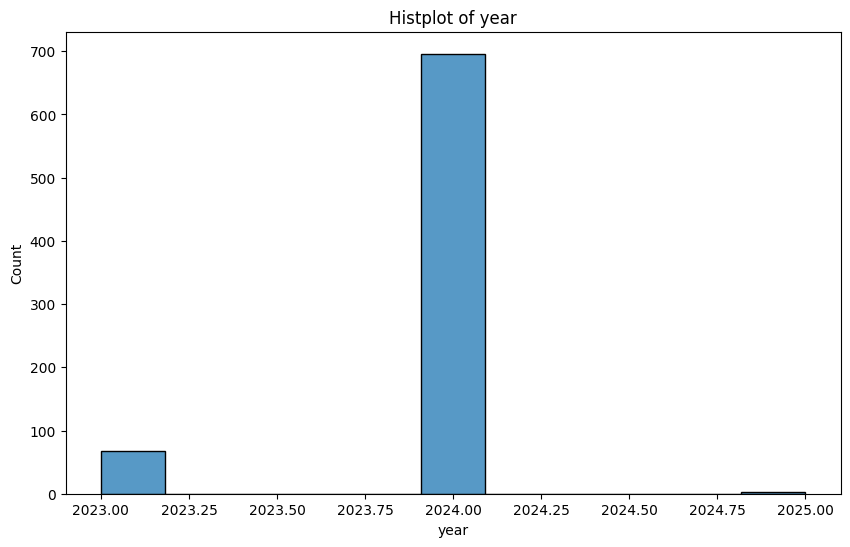

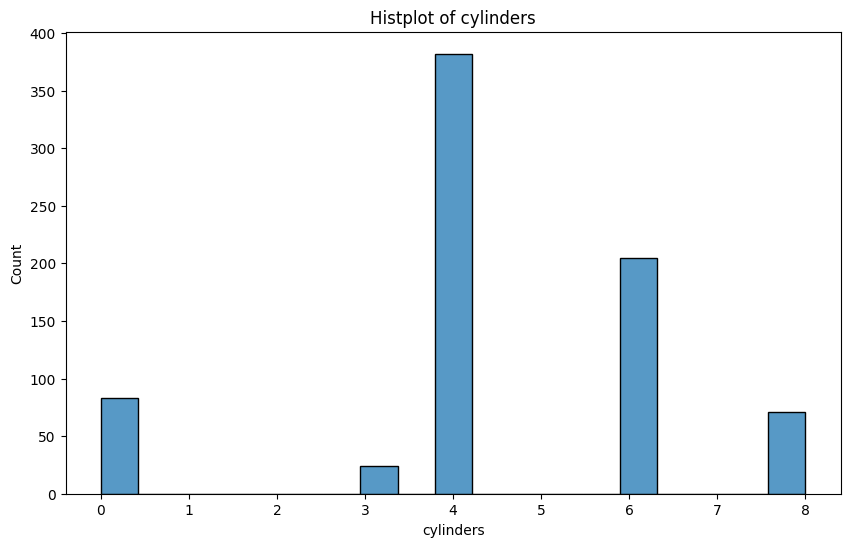

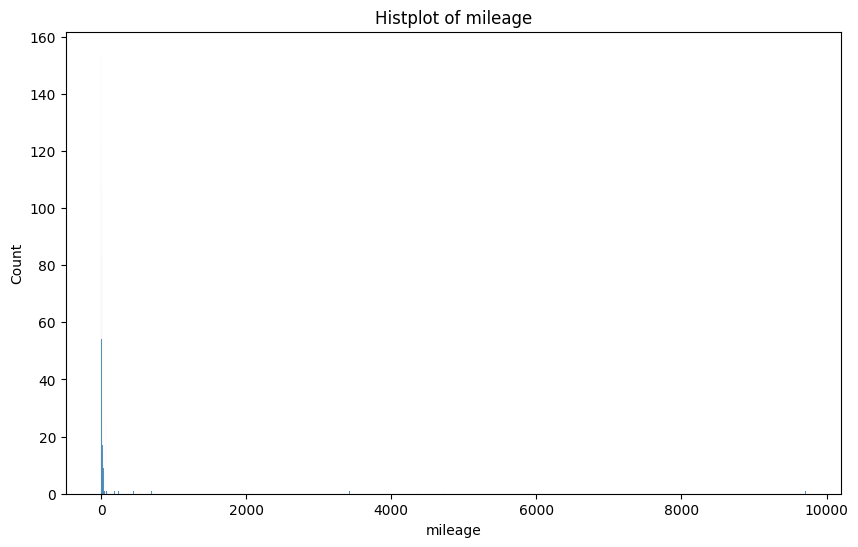

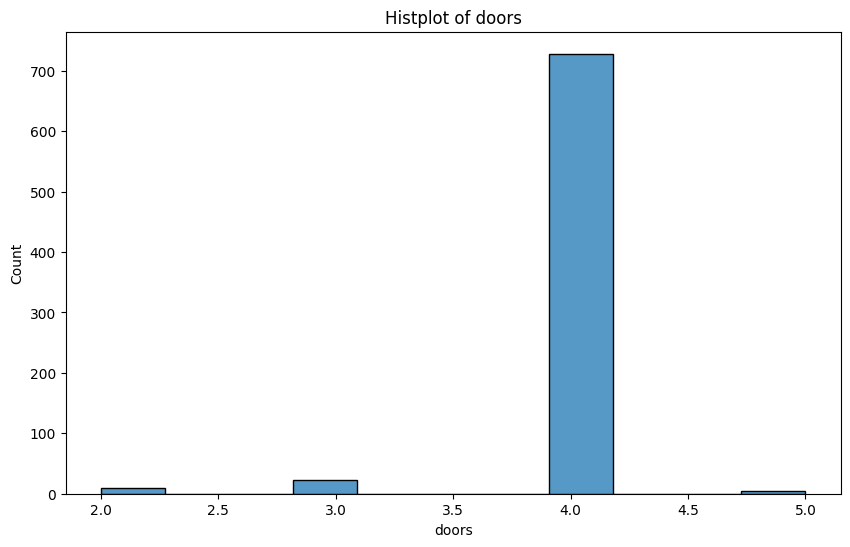

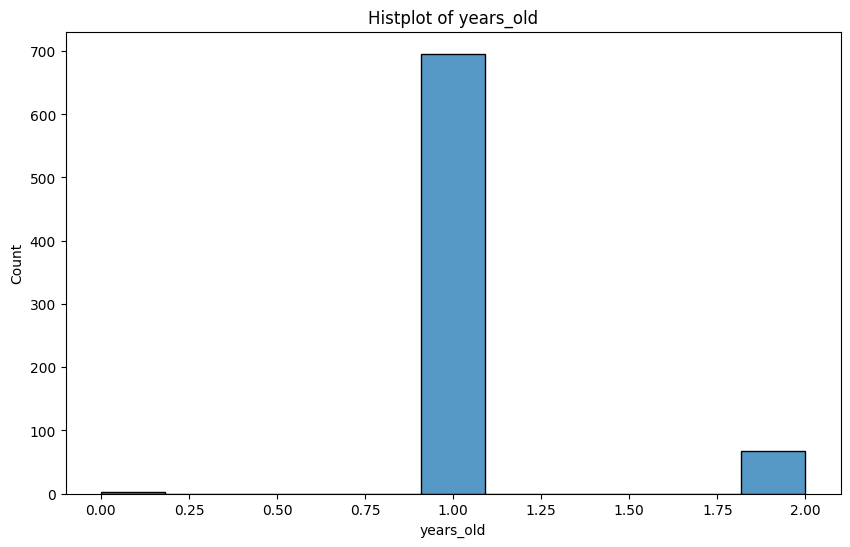

In [33]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=train_set[col])
    plt.title(f'Histplot of {col}')
    plt.savefig(f'src/img/histplot_{col}.png')
    plt.show()
    


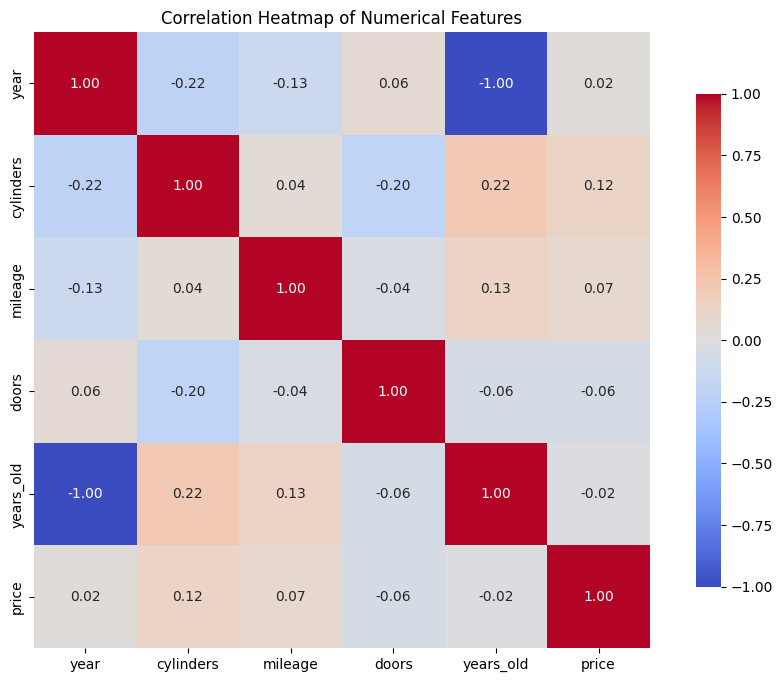

In [34]:
#Vemos correlación entre las variables numericas
all_num = num_cols + [target]
plt.figure(figsize=(12, 8))
sns.heatmap(train_set[all_num].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('src/img/correlation_heatmap.png')

In [35]:
train_set.mileage.describe()

count     765.000000
mean       66.019381
std       504.435796
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max      9711.000000
Name: mileage, dtype: float64

## Selección de Variables 

In [36]:
# Decidimos que variables usaremos para el modelo
features = ['make', 'mileage', 'fuel', 'body', 'cylinders', 'doors', 'transmission', 'drivetrain', 'interior_color', 'years_old']

In [37]:
X_train = train_set[features]
y_train = train_set[target]
X_test = test_set[features]
y_test = test_set[target]

## Modelado
Usaremos los modelos Regresion Lineal, DecisionTree, Random Forest, XGBoost, LightGBM y CatBoost y nos quedaremos con el mejor

### Regresión Lineal

In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [39]:
# En primer lugar procesamos los datos para que el modelo pueda trabajar con ellos
variables_categoricas = X_train.select_dtypes(include="object").columns.tolist()
variables_numericas = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()


In [40]:
y_train_log = np.log(y_train)  # Aplicamos logaritmo a la variable objetivo
y_test_log = np.log(y_test)  # Aplicamos logaritmo a la variable objetivo en el conjunto de test

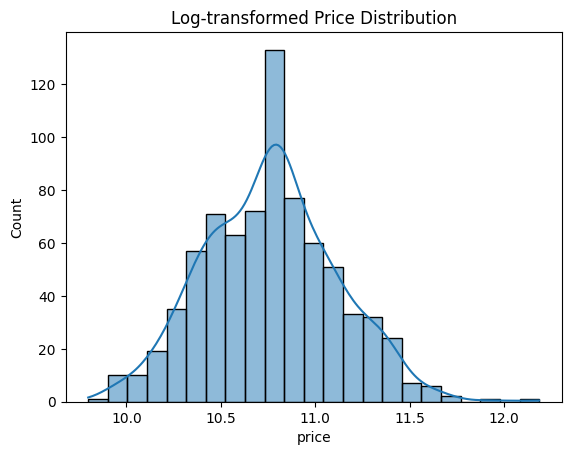

In [41]:
sns.histplot(y_train_log, kde=True)
plt.title('Log-transformed Price Distribution')
plt.savefig('src/img/log_transformed_price_distribution.png')

In [42]:
# Creamos el preprocesador para transformar las variables categoricas y numericas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), variables_numericas),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), variables_categoricas)
]) 


In [43]:
#Creamos un pipeline con el modelo
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", ElasticNet(max_iter=10000))
])

In [44]:
# El GridSearchCV nos permite encontrar los mejores hiperparámetros para el modelo
param_grid = {
    "model__alpha": [0.1, 1, 10, 100],
    "model__l1_ratio": [0.2,0.4,0.6,1]
}

In [45]:
# Instanciamos y entrenamos el GridsearchCV para encontrar los mejores hiperparámetros
lr_grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=1
)
lr_grid.fit(X_train, y_train_log)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['mileage',
                                                                          'cylinders',
                                                                          'doors',
                                                                          'years_old']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make',
                                                                          'fuel',
                                                                          'body',
                                                                          'transmission',
                                                                          'drivetrain',
                                                                          'interior_color'])])),
                                       ('model', ElasticNet(max_iter=10000))]),
             param_grid={'model__alpha': [0.1, 1, 10, 100],
                         'model__l1_ratio': [0.2, 0.4, 0.6, 1]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [46]:
# Ahora podemos ver los mejores hiperparámetros y score encontrados
print("Best parameters found: ", lr_grid.best_params_)
print("Best score found: ", -lr_grid.best_score_)

Best parameters found:  {'model__alpha': 0.1, 'model__l1_ratio': 0.2}
Best score found:  0.3004179678296469


In [47]:
#vemos como predicen los datos de test
y_pred_log = lr_grid.predict(X_test)
# Deshacemos la transformación logarítmica para obtener las predicciones en la escala original
y_pred = np.exp(y_pred_log)
# Calculamos las métricas de error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")

MAE: 10184.91
MSE: 213742763.42
RMSE: 14619.94
MAPE: 20.68%


### DecisionTree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
# Creamos un pipeline con el modelo DecisionTreeRegressor
pipeline_dt = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

In [50]:
# Definimos los hiperparámetros que queremos ajustar
param_grid = {
    "model__max_depth": [1,8,12,20,None],
    "model__min_samples_leaf": [1,5,10,20],
    "model__max_features": ["sqrt","log2", None]
} 

In [51]:
# Utilizamos RandomizedSearchCV para encontrar los mejores hiperparámetros
# RandomizedSearchCV es más eficiente que GridSearchCV cuando tenemos muchos hiperparámetros y combinaciones posibles
tree_grid = RandomizedSearchCV(pipeline_dt, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")
# Entrenamos el modelo
tree_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['mileage',
                                                                                'cylinders',
                                                                                'doors',
                                                                                'years_old']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['make',
                                                                                'fuel',
                                                                                'body',
                                                                                'transmission',
                                                                                'drivetrain',
                                                                                'interior_color'])])),
                                             ('model',
                                              DecisionTreeRegressor(random_state=42))]),
                   n_iter=20,
                   param_distributions={'model__max_depth': [1, 8, 12, 20,
                                                             None],
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': [1, 5, 10,
                                                                    20]},
                   scoring='neg_mean_squared_error')

In [52]:
#ahora vemos los mejores hiperparámetros y score encontrados
print("Best parameters found: ", tree_grid.best_params_)
print("Best score found: ", -tree_grid.best_score_)
# Predecimos los datos de test
y_pred_tree = tree_grid.predict(X_test)
# Calculamos las métricas de error
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)
print(f"MAE: {mae_tree:.2f}")
print(f"MSE: {mse_tree:.2f}")
print(f"RMSE: {rmse_tree:.2f}")
print(f"MAPE: {mape_tree:.2%}")

Best parameters found:  {'model__min_samples_leaf': 10, 'model__max_features': None, 'model__max_depth': 8}
Best score found:  190833868.17624664
MAE: 8172.94
MSE: 133440196.76
RMSE: 11551.63
MAPE: 17.24%


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
#nos creamos un pipeline con el modelo RandomForestRegressor
pipeline_rf = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])
# Definimos los hiperparámetros que queremos ajustar
param_grid_rf = {
    "model__n_estimators": [100, 200, 400],
    "model__max_depth": [1, 8, 12, 20, None],
    "model__min_samples_leaf": [0.5, 1, 10, 20],
    "model__max_features": ["sqrt", "log2", None]
}

In [55]:
#Utilizamos RandomizedSearchCV para encontrar los mejores hiperparámetros
rf_grid = RandomizedSearchCV(pipeline_rf, 
                              cv=3,
                              n_iter=20,
                              param_distributions=param_grid_rf, 
                              scoring="neg_mean_squared_error",
                              verbose=1)
# Entrenamos el modelo
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['mileage',
                                                                                'cylinders',
                                                                                'doors',
                                                                                'years_old']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['make',
                                                                                'fuel',
                                                                                'body',
                                                                                'transmission',
                                                                                'drivetrain',
                                                                                'interior_color'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20,
                   param_distributions={'model__max_depth': [1, 8, 12, 20,
                                                             None],
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': [0.5, 1, 10,
                                                                    20],
                                        'model__n_estimators': [100, 200, 400]},
                   scoring='neg_mean_squared_error', verbose=1)

In [56]:
#Ahora vemos los mejores hiperparámetros y score encontrados
print("Best parameters found: ", rf_grid.best_params_)
print("Best score found: ", -rf_grid.best_score_)
# Predecimos los datos de test
y_pred_rf = rf_grid.predict(X_test)
# Calculamos las métricas de error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAPE: {mape_rf:.2%}")

Best parameters found:  {'model__n_estimators': 100, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': None}
Best score found:  117115518.59610133
MAE: 5356.78
MSE: 60787436.47
RMSE: 7796.63
MAPE: 11.00%


### XGBoost

In [57]:
from xgboost import XGBRegressor

In [58]:
# Para Xboost modificamos las columnas categoricas para que no den problemas
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()
# Convertimos las columnas categoricas a tipo 'category'
for col in variables_categoricas:
    X_train_xgb[col] = X_train_xgb[col].astype('category')
    X_test_xgb[col] = X_test_xgb[col].astype('category')

In [59]:
#Para XGBoost no usaremos Pipeline por lo que instanciaremos para que nos acepte las categoricas
xgb_clf = XGBRegressor(enable_categorical=True,
        tree_method="hist",
        random_state=42)
# Definimos los hiperparámetros que queremos ajustar
param_grid_xgb = {'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.2, 0.6, 0.9],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
          }

In [60]:
# Utilizamos RandomizedSearchCV para encontrar los mejores hiperparámetros
xgb_grid = RandomizedSearchCV(xgb_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")

In [61]:
xgb_grid.fit(X_train_xgb, y_train)

c:\Users\luis_\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "model__max_depth", "model__max_features", "model__min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\luis_\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "model__max_depth", "model__max_features", "model__min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\luis_\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "model__max_depth", "model__max_features", "model__min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fo

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'model__max_depth': [1, 8, 12, 20,
                                                             None],
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': [1, 5, 10,
                                                                    20]},
                   scoring='neg_mean_squared_error')

In [62]:
# Vemos los mejores hiperparámetros y score encontrados
print("Best parameters found: ", xgb_grid.best_params_)
print("Best score found: ", -xgb_grid.best_score_)
# Predecimos los datos de test
y_pred_xgb = xgb_grid.predict(X_test_xgb)
# Calculamos las métricas de error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAPE: {mape_xgb:.2%}")

Best parameters found:  {'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 12}
Best score found:  136517685.4873175
MAE: 5837.39
MSE: 72818021.58
RMSE: 8533.35
MAPE: 12.08%


### LigthGBM

In [63]:
from lightgbm import LGBMRegressor


In [64]:
# Usaremos la transformación a categoricas usada en XGBoost
X_train_lgb = X_train_xgb.copy()
X_test_lgb = X_test_xgb.copy()

In [65]:
#Instanciamos el modelo LGBMRegressor
lgb_clf = LGBMRegressor(verbose = -100)
# Definimos los hiperparámetros que queremos ajustar
param_grid_lgb= {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125,250]
          }

In [66]:
#inicializamos el RandomizedSearchCV para encontrar los mejores hiperparámetros
lgb_grid = RandomizedSearchCV(lgb_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid_lgb, 
                               scoring = "neg_mean_squared_error")
# Entrenamos el modelo
lgb_grid.fit(X_train_lgb, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(verbose=-100), n_iter=20,
                   param_distributions={'bagging_fraction': [0.3, 0.6, 1],
                                        'feature_fraction': [0.5, 1],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4],
                                        'max_bins': [125, 250],
                                        'max_depth': [3, 6, 12],
                                        'n_estimators': [100, 250, 500, 750]},
                   scoring='neg_mean_squared_error')

In [67]:
# vemos los mejores hiperparámetros y score encontrados
print("Best parameters found: ", lgb_grid.best_params_)
print("Best score found: ", -lgb_grid.best_score_)
# Predecimos los datos de test
y_pred_lgb = lgb_grid.predict(X_test_lgb)
# Calculamos las métricas de error
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
mape_lgb = mean_absolute_percentage_error(y_test, y_pred_lgb)
print(f"MAE: {mae_lgb:.2f}")
print(f"MSE: {mse_lgb:.2f}")
print(f"RMSE: {rmse_lgb:.2f}")
print(f"MAPE: {mape_lgb:.2%}")

Best parameters found:  {'n_estimators': 750, 'max_depth': 3, 'max_bins': 125, 'learning_rate': 0.1, 'feature_fraction': 0.5, 'bagging_fraction': 0.3}
Best score found:  132499045.50667499
MAE: 6521.04
MSE: 81901632.39
RMSE: 9049.95
MAPE: 13.05%


### CatBoost

In [68]:
from catboost import CatBoostRegressor

In [69]:
#CatBoostRegressor no requiere preprocesamiento de las variables categoricas
# Instanciamos el modelo CatBoostRegressor
cat_clf = CatBoostRegressor(verbose=False, random_state=42, learning_rate=0.1)
# Entrenamos el modelo
cat_clf.fit(X_train, y_train, cat_features=variables_categoricas)


In [70]:
#predecimos los datos de test
y_pred_cat = cat_clf.predict(X_test)
# Calculamos las métricas de error
mae_cat = mean_absolute_error(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)
mape_cat = mean_absolute_percentage_error(y_test, y_pred_cat)
print(f"MAE: {mae_cat:.2f}")
print(f"MSE: {mse_cat:.2f}")
print(f"RMSE: {rmse_cat:.2f}")
print(f"MAPE: {mape_cat:.2%}")

MAE: 6111.87
MSE: 72960637.91
RMSE: 8541.70
MAPE: 12.11%


## Comparación de Modelos

In [71]:
# Procedemos a comparar los modelos
resultados = []
modelos = {"Regresion Lineal":lr_grid,"DecisionTree":tree_grid,"Random Forest":rf_grid,"XGBoost":xgb_grid,"LightGBM":lgb_grid,"CatBoost":cat_clf}

for nombre, modelo in modelos.items():
    if nombre == "Regresion Lineal":
        
        #vemos como predicen los datos de test
        pred_log = modelo.predict(X_test)
        # Deshacemos la transformación logarítmica para obtener las predicciones en la escala original
        pred = np.exp(y_pred_log)

        mae = mean_absolute_error(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        r2 = r2_score(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred)

        # Añadimos los resultados al diccionario

        resultados.append({
            "Modelo": nombre,
            "MAE": round(mae, 2),
            "RMSE": round(rmse, 2),
            "R²": round(r2, 3),
            "MAPE": round(mape, 3)
        })

    elif nombre == "XGBoost" or nombre == "LightGBM":   
        pred = modelo.predict(X_test_lgb)
        
        mae = mean_absolute_error(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        r2 = r2_score(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred)

        resultados.append({
            "Modelo": nombre,
            "MAE": round(mae, 2),
            "RMSE": round(rmse, 2),
            "R²": round(r2, 3),
            "MAPE": round(mape, 3)
        })
    else:
        pred = modelo.predict(X_test)
        
        mae = mean_absolute_error(y_test, pred)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        r2 = r2_score(y_test, pred)
        mape = mean_absolute_percentage_error(y_test, pred)

        resultados.append({
            "Modelo": nombre,
            "MAE": round(mae, 2),
            "RMSE": round(rmse, 2),
            "R²": round(r2, 3),
            "MAPE": round(mape, 3)
        })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados).sort_values("RMSE")
print(df_resultados)

             Modelo       MAE      RMSE     R²   MAPE
2     Random Forest   5356.78   7796.63  0.775  0.110
3           XGBoost   5837.39   8533.35  0.730  0.121
5          CatBoost   6111.87   8541.70  0.729  0.121
4          LightGBM   6521.04   9049.95  0.696  0.131
1      DecisionTree   8172.94  11551.63  0.505  0.172
0  Regresion Lineal  10184.91  14619.94  0.207  0.207


### Modelo ganador RANDOM FOREST

## Guardado de Modelos

In [72]:
import joblib

In [73]:
joblib.dump(lr_grid, 'src/models/linear_regression_model.pkl')
joblib.dump(tree_grid, 'src/models/decision_tree_model.pkl')
joblib.dump(rf_grid, 'src/models/random_forest_model.pkl')
joblib.dump(xgb_grid, 'src/models/xgboost_model.pkl')
joblib.dump(lgb_grid, 'src/models/lightgbm_model.pkl')
joblib.dump(cat_clf, 'src/models/catboost_model.pkl')

['src/models/catboost_model.pkl']